
# Project Directory Structure

This project has the following folder and file structure:

```plaintext
project-root/
│
├── sport_data_dict/                # Contains the dictionary data for each sport
│   ├── Athletics.csv               # Data for the Athletics sport in CSV format
│   ├── Swimming.csv                # Data for the Swimming sport in CSV format
│   └── AnotherSport.csv            # Data for another sport
│
├── model_plots/                    # Contains the saved model comparison plots for each sport and parameter
│   ├── Athletics_drug_comparison.png
│   ├── Athletics_equity_comparison.png
│   ├── Swimming_popularity_comparison.png
│   └── ...                         # More plots for different sports and parameters
│
├── model_metrics/                  # Contains evaluation metrics for each model
│   ├── metrics_summary.csv         # CSV file with R² and MSE scores for each model, sport, and parameter
│   ├── r2_comparison.png           # Visualization of R² scores across models
│   └── mse_comparison.png          # Visualization of MSE scores across models
│
├── src/                            # Source code directory
│   ├── main.py                     # Main script for model training and evaluation
│   ├── utils.py                    # Utility functions, if any
│   └── visualize.py                # Script for visualizing metrics
│
└── README.md                       # Project documentation
```

# Structure of `sport_data_dict`

`sport_data_dict` is a dictionary where:

- **Key**: The name of the sport (e.g., `'Athletics'`)
- **Value**: A DataFrame containing yearly data for various parameters.

### Example Entry: `'Athletics'`

| Year | drug | equity | popularity | normalizedcountry | CV    | label |
|------|------|--------|------------|--------------------|-------|-------|
| 1896 | 0.0  | 0.0000 | 0.278947   | 0.045              | 1.001 | 1     |
| 1900 | 0.0  | 0.0000 | 0.120868   | 0.085              | 0.975 | 1     |
| 1904 | 0.0  | 0.0000 | 0.154497   | 0.055              | 0.978 | 1     |
| 1906 | 0.0  | 0.0000 | 0.271206   | 0.100              | 0.893 | 1     |
| 1908 | 0.0  | 0.0000 | 0.250887   | 0.100              | 1.032 | 1     |
| ...  | ...  | ...    | ...        | ...                | ...   | ...   |

### Key Components:
1. **Year**: The year of observation (used as the index).
2. **drug**: Numeric value for drug-related data.
3. **equity**: Numeric value representing equity.
4. **popularity**: Numeric value indicating popularity.
5. **normalizedcountry**: A normalized metric by country.
6. **CV**: Coefficient of variation.
7. **label**: Label associated with the sport for classification.

### Structure in Python:

```python
sport_data_dict = {
    'Athletics': pd.DataFrame({
        'Year': [1896, 1900, 1904, 1906, 1908, ...],
        'drug': [0.0, 0.0, 0.0, 0.0, 0.0, ...],
        'equity': [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, ...],
        'popularity': [0.278947, 0.120868, 0.154497, 0.271206, 0.250887, ...],
        'normalizedcountry': [0.045, 0.085, 0.055, 0.100, 0.100, ...],
        'CV': [1.001, 0.975, 0.978, 0.893, 1.032, ...],
        'label': [1, 1, 1, 1, 1, ...]
    }),
    'Swimming': pd.DataFrame({
        'Year': [1896, 1900, 1904, 1906, 1908, ...],
        'drug': [...],
        'equity': [...],
        'popularity': [...],
        'normalizedcountry': [...],
        'CV': [...],
        'label': [...]
    }),
    ...
}
```

In [2]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv("not_final3.csv")
df = df.rename(columns={'Sport_-1': 'Sport'})

# List of sports to exclude
excluded_sports = ['climbing', 'Fitness', 'Headis']

# Filter out excluded sports
df = df[~df['Sport'].isin(excluded_sports)]

# Define parameters including 'label'
parameters = ['drug', 'equity', 'popularity', 'normalizedcountry', 'CV', 'label']

# Initialize a dictionary to store processed data for each sport
sport_data_dict = {}

for sport_name in df['Sport'].unique():
    sport_dict = {'Year': []}
    
    # Initialize a DataFrame for Year
    all_years = pd.Series(dtype=int)
    
    for parameter in parameters:
        param_columns = [col for col in df.columns if col.startswith(f"{parameter}_")]
        
        if not param_columns:
            continue
        
        # Melt the data for this parameter
        melted_data = df[df['Sport'] == sport_name][['Sport'] + param_columns].melt(
            id_vars='Sport', var_name='Year', value_name=f'{parameter}_Value'
        )
        melted_data['Year'] = melted_data['Year'].str.extract(r'(\d+)').astype(int)  # Extract year as int
        melted_data = melted_data.sort_values('Year')

        if all_years.empty:
            all_years = melted_data['Year']
        else:
            all_years = pd.concat([all_years, melted_data['Year']]).drop_duplicates().sort_values()
        
        # Align parameter data with all years
        melted_data = melted_data.set_index('Year').reindex(all_years).reset_index()
        
        # Handle missing data based on parameter type
        if parameter == 'drug':
            melted_data[f'{parameter}_Value'] = melted_data[f'{parameter}_Value'].fillna(0)  # For drug, fill missing with 0
        elif parameter in ['popularity', 'CV']:
            # For popularity and CV, treat 0 as missing and replace with NaN
            melted_data[f'{parameter}_Value'] = melted_data[f'{parameter}_Value'].replace(0, np.nan)
        else:
            # Preserve NaN for other parameters
            melted_data[f'{parameter}_Value'] = melted_data[f'{parameter}_Value']
        
        # Store parameter values aligned by Year
        sport_dict[parameter] = melted_data[f'{parameter}_Value'].values

    # Ensure that Year is included
    sport_dict['Year'] = all_years.values
    
    # Convert the dictionary to a DataFrame
    sport_data_dict[sport_name] = pd.DataFrame(sport_dict)

# Example usage: print data for a specific sport
for sport, data in sport_data_dict.items():
    data.set_index('Year', inplace=True)  # Ensure Year is the index
    

    print(f"\nData for {sport}:")
    print(data.head())



Data for Alpine Skiing:
      drug  equity  popularity  normalizedcountry  CV  label
Year                                                        
1896   0.0     NaN         NaN                NaN NaN      0
1900   0.0     NaN         NaN                NaN NaN      0
1904   0.0     NaN         NaN                NaN NaN      0
1906   0.0     NaN         NaN                NaN NaN      0
1908   0.0     NaN         NaN                NaN NaN      0

Data for Alpinism:
      drug  equity  popularity  normalizedcountry  CV  label
Year                                                        
1896   0.0     NaN         NaN                NaN NaN      0
1900   0.0     NaN         NaN                NaN NaN      0
1904   0.0     NaN         NaN                NaN NaN      0
1906   0.0     NaN         NaN                NaN NaN      0
1908   0.0     NaN         NaN                NaN NaN      0

Data for Archery:
      drug    equity  popularity  normalizedcountry        CV  label
Year         

In [3]:
sport_data_dict['Athletics']

,drug,equity,popularity,normalizedcountry,CV,label
Year,,,,,,
1896,0.0,0.000000,0.278947,0.045,1.001050,1
1900,0.0,0.000000,0.120868,0.085,0.975667,1
1904,0.0,0.000000,0.154497,0.055,0.978102,1
1906,0.0,0.000000,0.271206,0.100,0.892952,1
1908,0.0,0.000000,0.250887,0.100,1.032252,1
1912,0.0,0.000000,0.238119,0.135,1.179248,1
1920,0.0,0.000000,0.197810,0.125,1.024756,1
1924,0.0,0.000000,0.176181,0.200,1.126996,1
1928,0.0,0.130040,0.177969,0.200,1.152680,1


In [5]:
import os
import pickle
import pandas as pd
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import warnings

# Suppress warnings for cleaner output
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

# Create output directories for plots, metrics, and model weights
os.makedirs("model_plots", exist_ok=True)
os.makedirs("model_metrics", exist_ok=True)
os.makedirs("model_weights", exist_ok=True)

# Initialize a list to store R² and MSE scores
metrics_data = []

# Function for moving average prediction
def moving_average_predict(train_data, window_size):
    return train_data[-window_size:].mean()

def train_and_evaluate_ma_model(train_data, test_data, parameter, save_path, window_sizes):
    best_r2 = -float('inf')
    best_mse = float('inf')
    best_window_size = None
    best_predictions = None

    for window_size in window_sizes:
        predictions = []
        actuals = []  # Initialize actuals for each window_size iteration
        extended_train_data = train_data.copy()

        for i in range(len(test_data)):
            # Predict using moving average
            if len(extended_train_data) >= window_size:
                prediction = moving_average_predict(extended_train_data[parameter], window_size)
            else:
                prediction = extended_train_data[parameter].mean()

            predictions.append(prediction)
            actuals.append(test_data[parameter].iloc[i])

            # Extend the training data
            extended_train_data = pd.concat([extended_train_data, test_data.iloc[[i]]])

        # Calculate R² and MSE
        r2 = r2_score(actuals, predictions)
        mse = mean_squared_error(actuals, predictions)

        # Save best model parameters
        if r2 > best_r2:
            best_r2, best_mse = r2, mse
            best_window_size = window_size
            best_predictions = predictions

    # Save the best model
    model_file = f"{save_path}/MA_{parameter}_best.pkl"
    with open(model_file, 'wb') as f:
        pickle.dump({"window_size": best_window_size}, f)

    return best_r2, best_mse, best_predictions, actuals, best_window_size


# Main loop for training and evaluation
for sport, df in sport_data_dict.items():
    for parameter in ['drug', 'equity', 'popularity', 'normalizedcountry', 'CV']:
        if parameter not in df.columns:
            continue

        # Ensure the Year index is converted to a PeriodIndex
        df.index = pd.PeriodIndex(df.index, freq='Y')

        # Select parameter data, drop NaNs
        parameter_df = df[[parameter]].dropna()

        if len(parameter_df) < 10:
            continue

        year_data = parameter_df.index
        train_data = parameter_df.iloc[:-1]
        test_data = parameter_df.iloc[1:]

        # Save models in a specific folder for each sport
        sport_model_path = f"model_weights/{sport}"
        os.makedirs(sport_model_path, exist_ok=True)

        # Define window sizes for hyperparameter tuning
        window_sizes = range(2, min(10, len(train_data)))

        # Train and evaluate MA model
        ma_r2, ma_mse, ma_predicted, ma_actuals, best_window_size = train_and_evaluate_ma_model(
            train_data, test_data, parameter, sport_model_path, window_sizes
        )

        # Plot predictions
        fig, ax = plt.subplots(figsize=(12, 8))
        ax.plot(year_data[1:].to_timestamp(), ma_actuals, label='Actuals', color='black')
        ax.plot(year_data[1:].to_timestamp(), ma_predicted, label=f'MA (window={best_window_size})', color='blue')
        ax.set_title(f'{sport} - {parameter}')
        ax.set_xlabel('Year')
        ax.set_ylabel('Parameter Value')
        ax.grid(True)
        plt.legend()
        plt.savefig(f"model_plots/{sport}_{parameter}_MA_comparison.png")
        plt.close()

        # Append metrics for evaluation
        metrics_data.append({
            'Sport': sport,
            'Parameter': parameter,
            'Model': 'Moving Average',
            'R2': ma_r2,
            'MSE': ma_mse,
            'Best Window Size': best_window_size
        })

# Save metrics to CSV
metrics_df = pd.DataFrame(metrics_data)
metrics_df.to_csv('model_metrics/metrics_ma_summary.csv', index=False)

print("Training and evaluation completed. Models and metrics saved.")


Training and evaluation completed. Models and metrics saved.


In [ ]:
print(f"Year Data Type: {type(year_data)}")
print(f"Year Data Example: {year_data[:5]}")
print(f"ARIMA Actuals Type: {type(arima_actuals)}")
print(f"ARIMA Actuals Example: {arima_actuals[:5]}")


Year Data Type: <class 'pandas.core.indexes.period.PeriodIndex'>
Year Data Example: PeriodIndex(['1896', '1904', '1906', '1908', '1912'], dtype='period[Y-DEC]', name='Year')
ARIMA Actuals Type: <class 'list'>
ARIMA Actuals Example: [0.7601360049143081, 0.7364660694615496, 0.7257210550535053, 0.8792552241336439, 0.7782764841072135]


In [6]:
# Test with one sport and parameter
sport = 'Athletics'
parameter = 'drug'

df = sport_data_dict[sport]
df.index = pd.PeriodIndex(df.index, freq='Y')
parameter_df = df[[parameter]].dropna()

year_data = parameter_df.index
year_data_plot = year_data.to_timestamp()  # Conversion for plotting
train_data = parameter_df.iloc[:-1]
test_data = parameter_df.iloc[1:]

# Fit one model for test
arima_model = sm.tsa.ARIMA(train_data[parameter], order=(1, 1, 1))
model_fit = arima_model.fit()
arima_predicted = model_fit.forecast(steps=len(test_data))
arima_actuals = test_data[parameter]

# Plot results
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(year_data_plot[1:], arima_actuals, label='Actuals', color='black')
ax.plot(year_data_plot[1:], arima_predicted, label='ARIMA', color='green')
ax.set_title(f'Test Plot: {sport} - {parameter}')
ax.set_xlabel('Year')
ax.set_ylabel('Parameter Value')
plt.legend()
plt.show()


NameError: name 'sm' is not defined

In [ ]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(train_data[parameter])
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")
if result[1] > 0.05:
    print("Data is non-stationary. Consider differencing.")
else:
    print("Data is stationary.")


ADF Statistic: -9.21759964718664
p-value: 1.8160617883769962e-15
Data is stationary.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the metrics from the CSV file
metrics_df = pd.read_csv('model_metrics/metrics_summary.csv')
print(metrics_df.head())  # Preview the first few rows


           Sport Parameter    Model        R2       MSE
0  Alpine Skiing      drug    ARIMA  1.000000  0.000000
1  Alpine Skiing      drug   SARIMA  1.000000  0.000000
2  Alpine Skiing      drug  SARIMAX  1.000000  0.000000
3  Alpine Skiing    equity    ARIMA -0.029285  0.001349
4  Alpine Skiing    equity   SARIMA -0.095740  0.001436


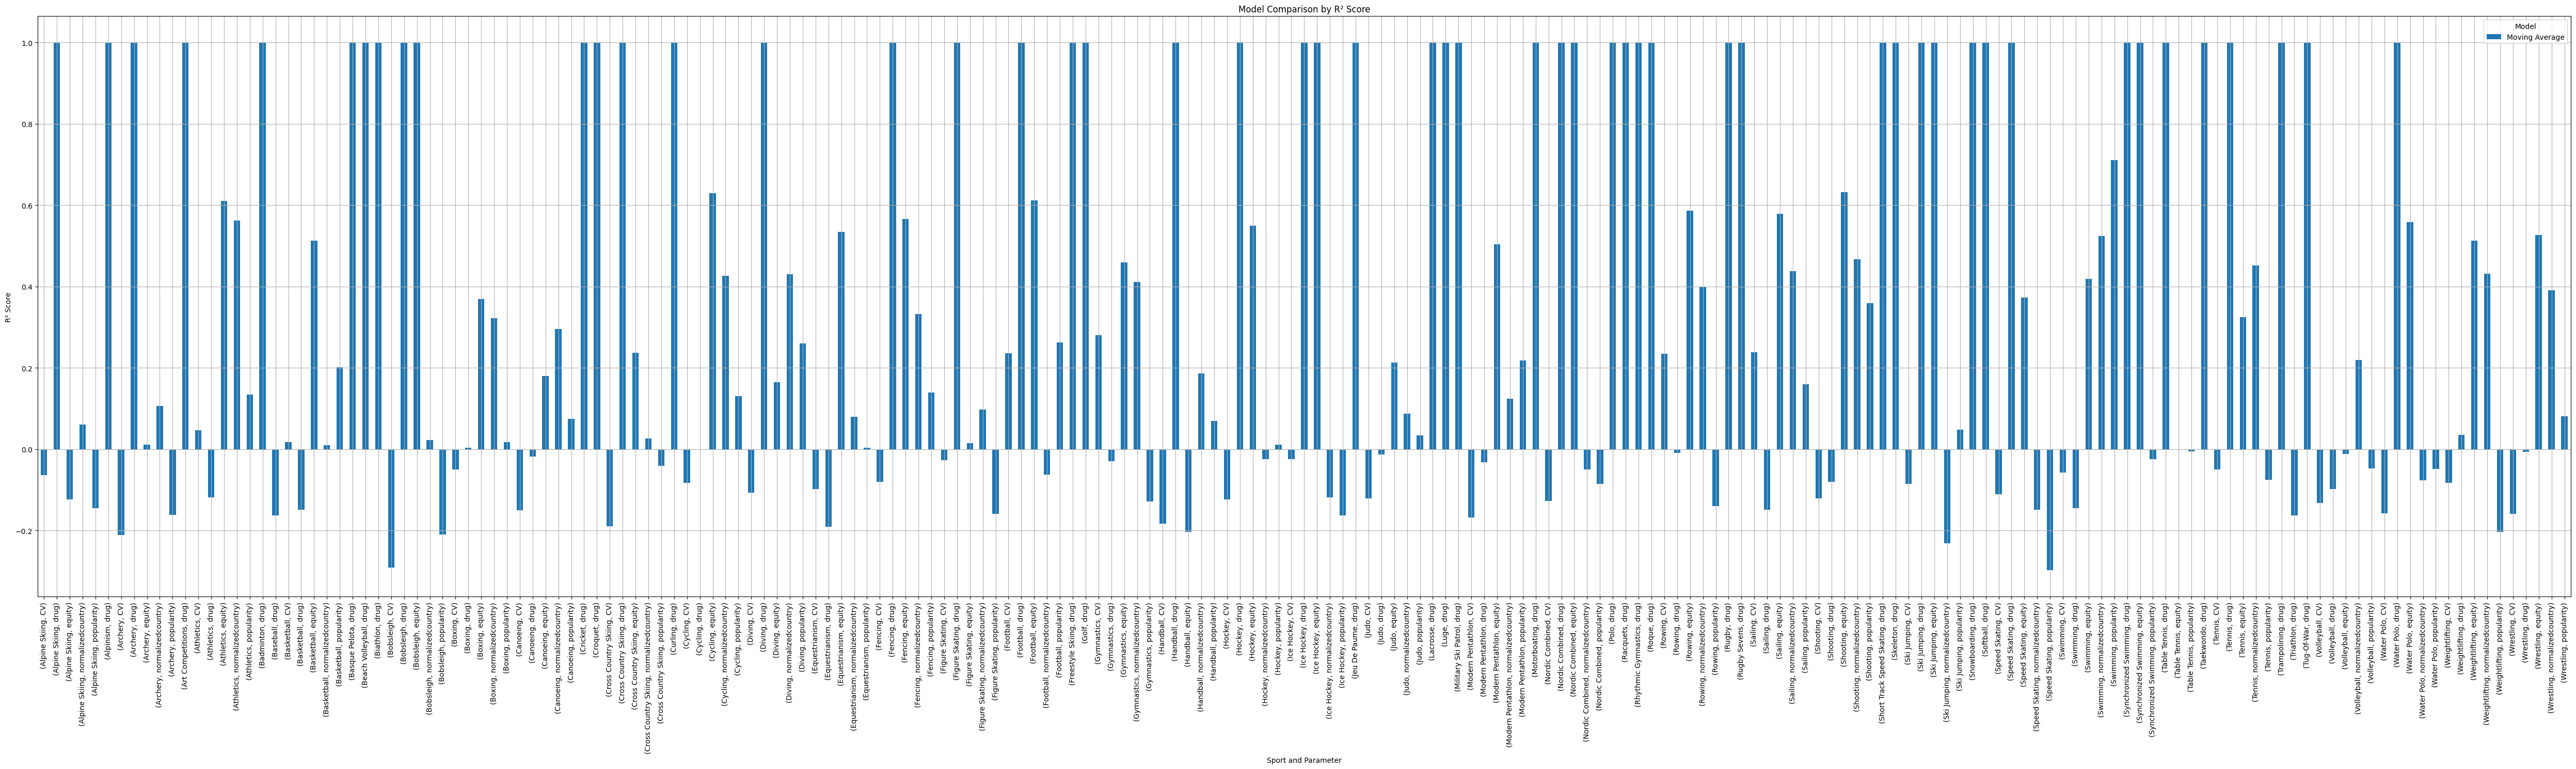

In [7]:
# Group the data by model and calculate the mean R² for each
r2_scores = metrics_df.pivot_table(values='R2', index=['Sport', 'Parameter'], columns='Model')

# Plot the R² scores
r2_scores.plot(kind='bar', figsize=(50, 15))
plt.title('Model Comparison by R² Score')
plt.xlabel('Sport and Parameter')
plt.ylabel('R² Score')
plt.legend(title='Model')
plt.grid(True)
plt.tight_layout()
plt.savefig('model_metrics/r2_comparison.png')
plt.show()


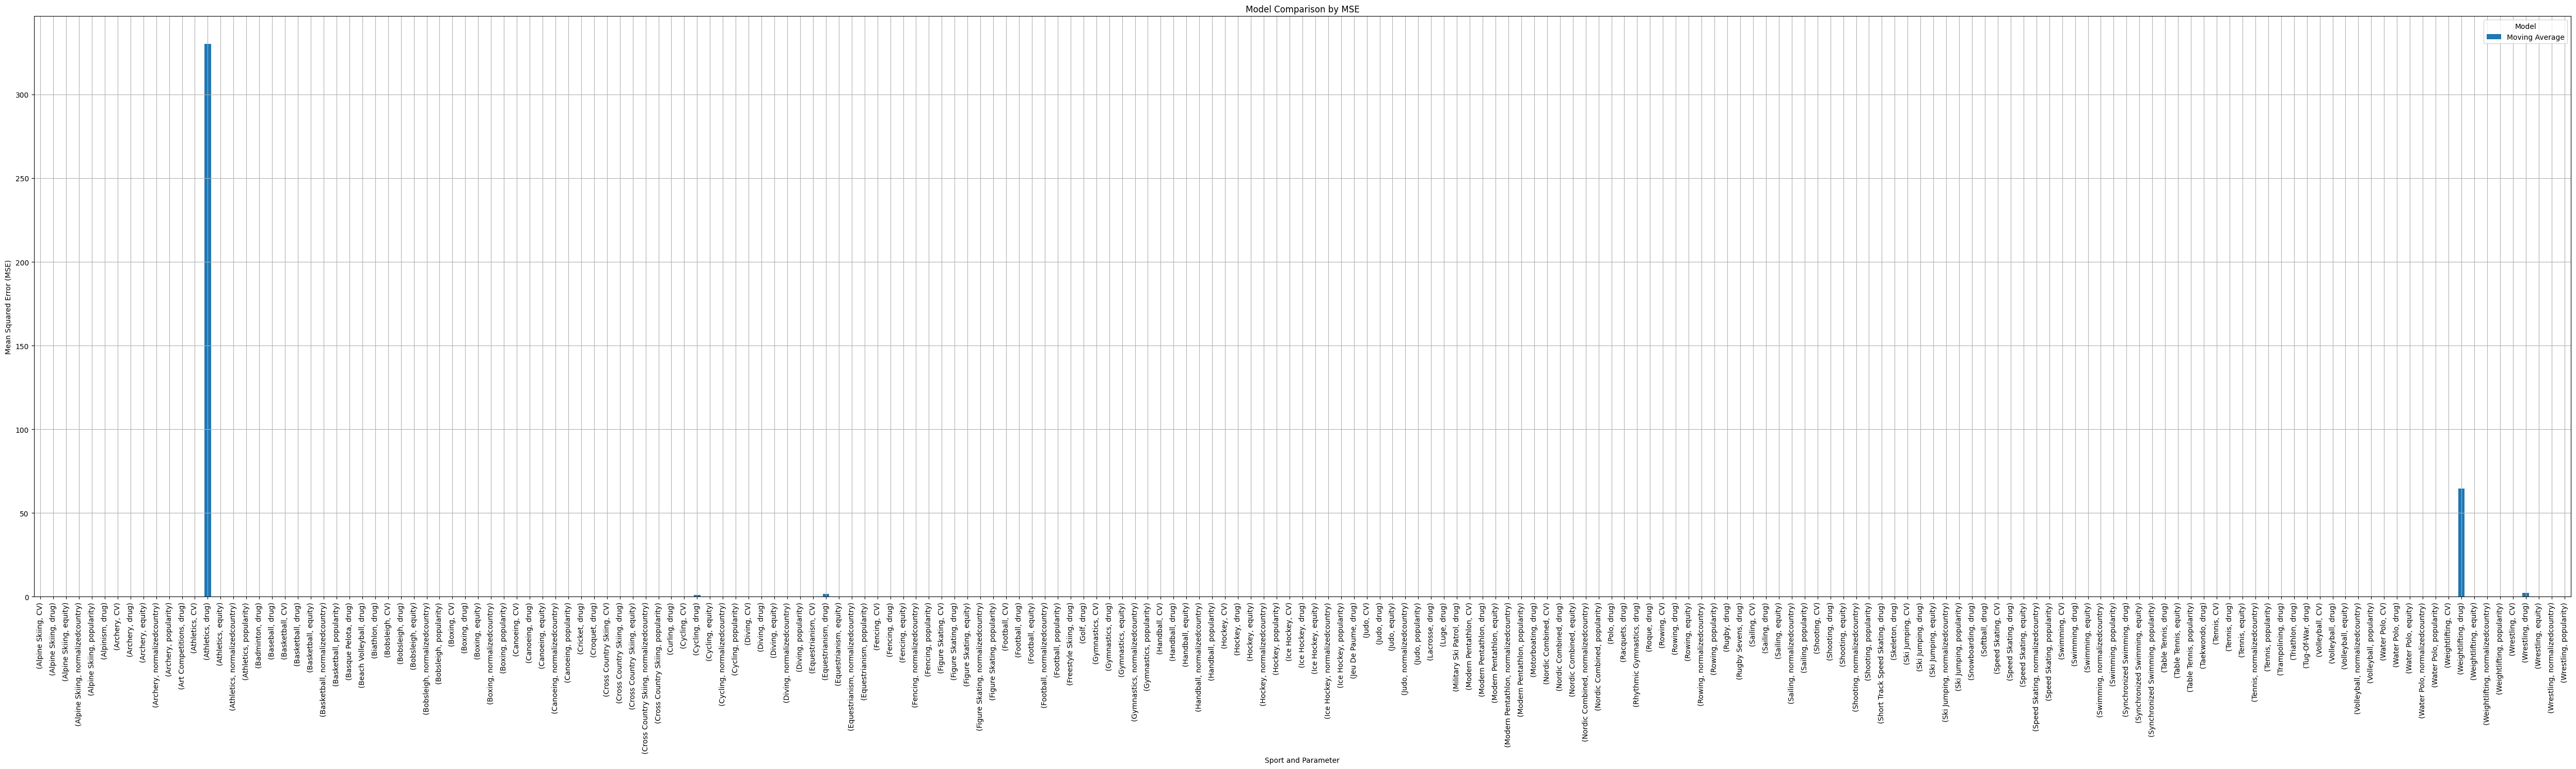

In [9]:
# Group the data by model and calculate the mean MSE for each
mse_scores = metrics_df.pivot_table(values='MSE', index=['Sport', 'Parameter'], columns='Model')

# Plot the MSE scores
mse_scores.plot(kind='bar', figsize=(50, 15))
plt.title('Model Comparison by MSE')
plt.xlabel('Sport and Parameter')
plt.ylabel('Mean Squared Error (MSE)')
plt.legend(title='Model')
plt.grid(True)
plt.tight_layout()
plt.savefig('model_metrics/mse_comparison.png')
plt.show()
